In [4]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import npeb
from npeb.GLMixture import GLMixture
import itertools
from scipy.linalg import sqrtm, inv
from scipy.spatial import distance_matrix
import ot

In [21]:
n = 2500
p = 0.3
center1 = np.asarray([0.5, 0.5])
center2 = np.asarray([-0.5, -0.5])
sigma2 = 1.0
tau2 = 0.1
np.random.seed(54321)

## Make Data

In [ ]:
centers = np.vstack([center1, center2])
def sample_latent(n, p):
    z = np.zeros((n,2))
    for i in range(n):
        # choose cluster with probability p
        c = np.random.choice([0,1], p=[p, 1-p])
        z[i,:] = centers[c,:]
    return z

In [10]:
Theta = sample_latent(n, p)
prec = np.ones_like(Theta) / sigma2
Z = Theta + np.random.randn(n,2) * np.sqrt(sigma2)

## Oracle Bayes

In [15]:
ob_model = GLMixture(prec_type='diagonal') # number of (empirical) support points to have for the oracle prior
supp = centers # this defines the (empirical) (oracle) prior support 
ob_model.set_params(atoms=centers, weights=np.ones(2)/2)
ob_means = ob_model.posterior_mean(Z, prec)
prior_weights, ob_samples = ob_model.posterior_sample(Z, prec, n_samples=2500)

## Empirical Bayes

In [17]:
eb_model = GLMixture(prec_type='diagonal')
eb_model.fit(Z, prec)

Selecting all data points as atoms: done.
Computing kernel matrix: done.
Solving for discretized NPMLE: done.


[np.float64(-3.009687145109325),
 np.float64(-3.009677294954947),
 np.float64(-3.009672065433905),
 np.float64(-3.0096689774524683),
 np.float64(-3.0096668839231415),
 np.float64(-3.0096653111573772),
 np.float64(-3.0096640662807075),
 np.float64(-3.009663059227451),
 np.float64(-3.009662237263583),
 np.float64(-3.009661563178265),
 np.float64(-3.009661008093939)]

In [18]:
est_prior_weights, h_samples = eb_model.posterior_sample(Z, prec, n_samples=2500)
eb_means = eb_model.posterior_mean(Z, prec)

## Plotting

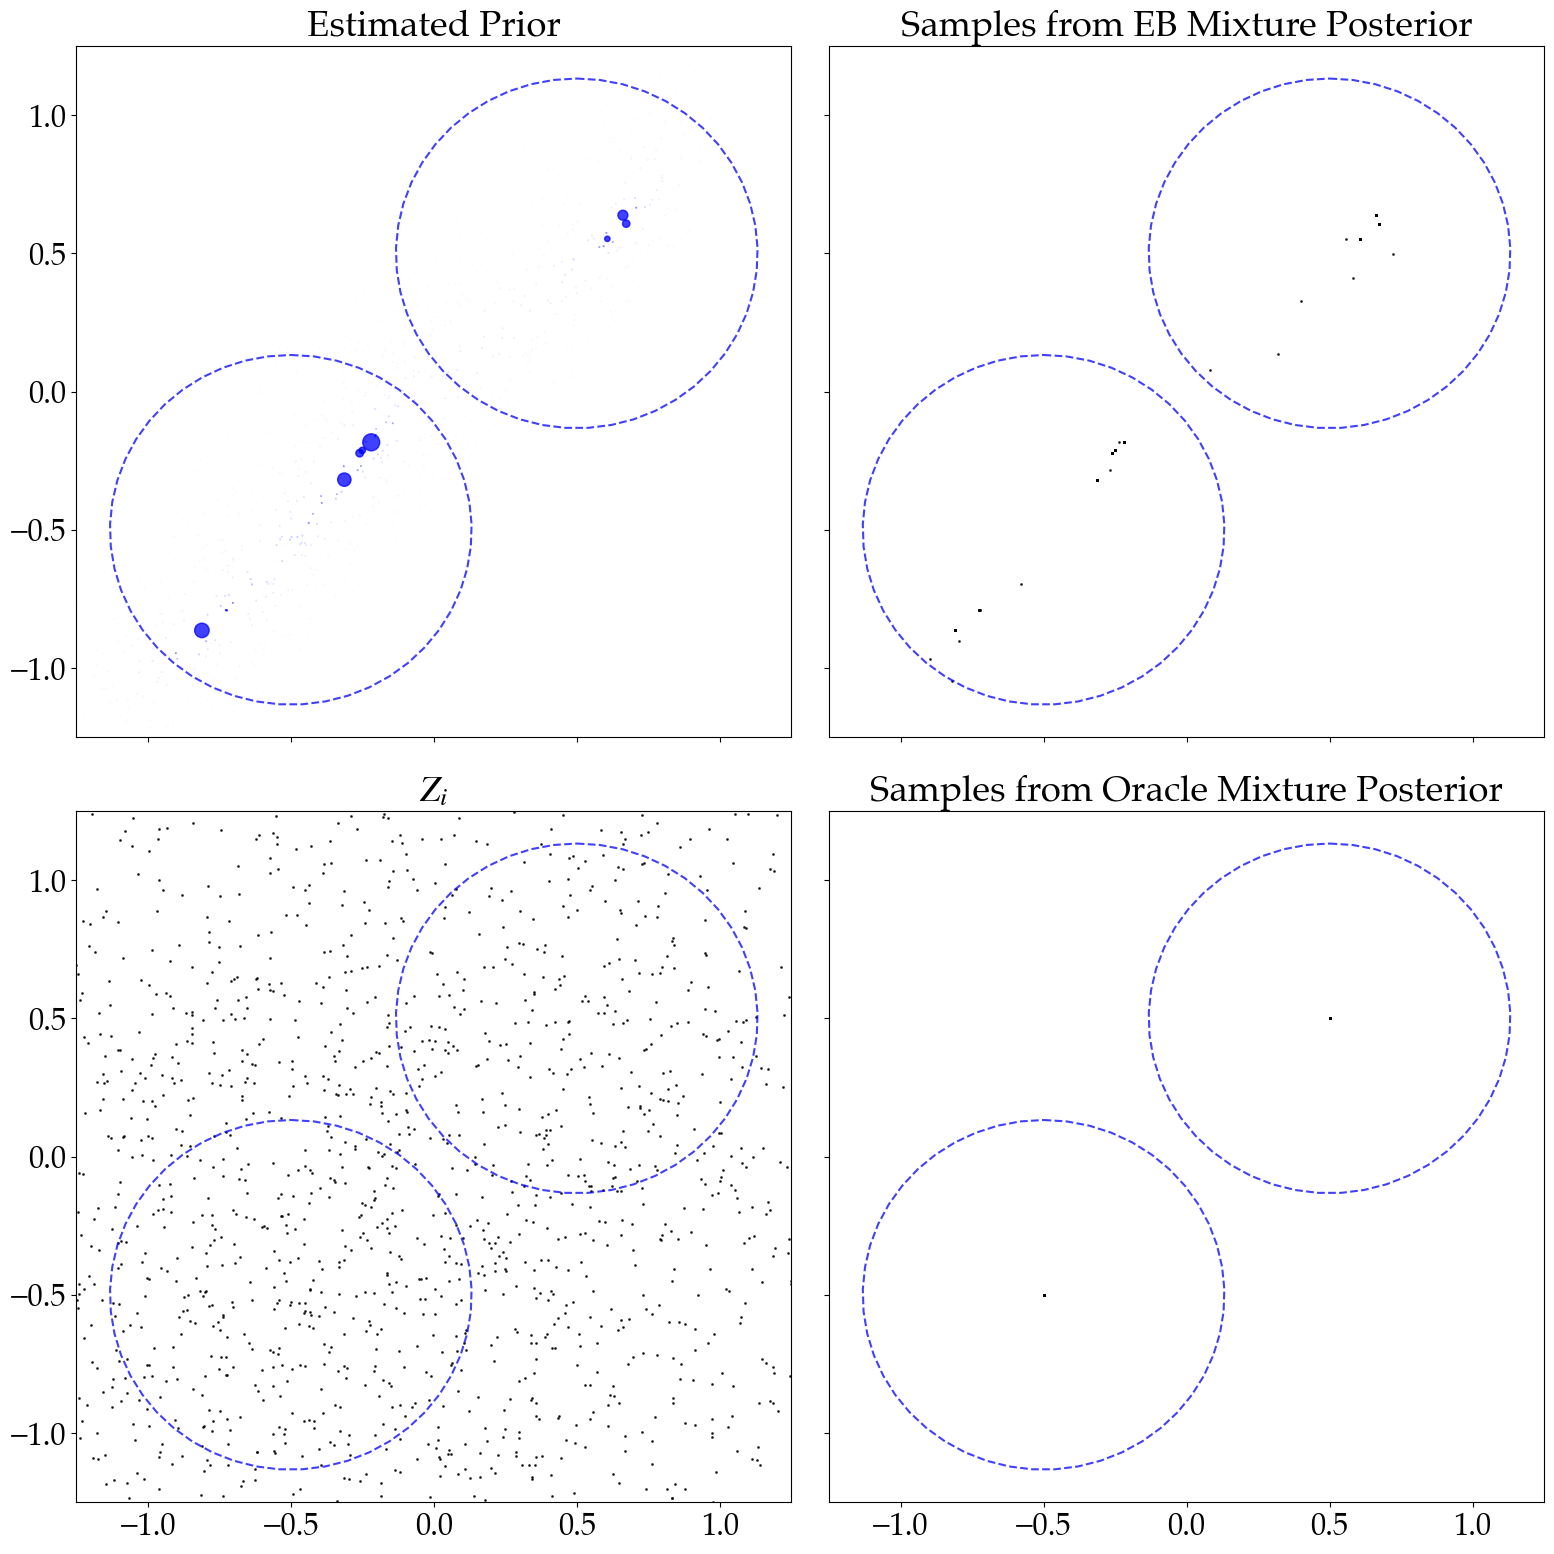

In [ ]:
plt.rcParams.update({'font.size': 22, 'mathtext.fontset': 'stix', 'font.family': 'serif', 'font.serif': 'Palatino'})
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,16))
Z_alpha = 0.75
Z_s = 1.0
G_alpha = 0.5

ax[0,0].set_title('Estimated Prior')
ax[0,0].scatter(eb_model.atoms[:,0], eb_model.atoms[:,1], s=500*est_prior_weights,color='blue', alpha=Z_alpha)

ax[1,0].set_title('$Z_i$')
ax[1,0].scatter(Z[:,0], Z[:,1], s=Z_s,color='black', alpha=Z_alpha)

ax[0,1].set_title('Samples from EB Mixture Posterior')
ax[0,1].scatter(h_samples[:, 0], h_samples[:,1], s=Z_s,color='black', alpha=Z_alpha)

ax[1,1].set_title('Samples from Oracle Mixture Posterior')
ax[1,1].scatter(ob_samples[:,0], ob_samples[:,1], s=Z_s,color='black', alpha=Z_alpha)

u = np.linspace(0,2*np.pi)
circ1 = center1 + 2*np.sqrt(tau2)*np.vstack([np.sin(u),np.cos(u)]).T
circ2 = center2 + 2*np.sqrt(tau2)*np.vstack([np.sin(u),np.cos(u)]).T
for i in range(2):
    for j in range(2):
        # if i > 0 or j > 0:
        ax[i,j].plot(circ1[:,0],circ1[:,1],color='blue',linestyle='dashed', alpha=0.75)
        ax[i,j].plot(circ2[:,0],circ2[:,1],color='blue',linestyle='dashed', alpha=0.75)
            # ax[i,j].scatter(Theta[:,0], Theta[:,1], s=Z_s,color='blue', alpha=G_alpha)

plt.xlim([-1.25,1.25])
plt.ylim([-1.25, 1.25])
plt.tight_layout()